<a href="https://colab.research.google.com/github/akhiroxxx/AI-ML-Project-CL/blob/main/Well_Log_Facies_Analysis_And_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [31]:
#Reading the data
df=pd.read_csv('facies_vectors.csv')
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


Doing Data Cleaning
Here we change well name and formation to categorical data to improve performance

In [32]:
df['Well Name']=df['Well Name'].astype('category')
df['Formation']=df['Formation'].astype('category')
df['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

Using a color map for better representation of the facies

In [33]:
f_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

f_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

#f_color_map is to map facies labels to their respective colors

f_color_map={}
for ind, label in enumerate(f_labels):
    f_color_map[label]=f_colors[ind]

def label_f(row, labels):
    return labels[row['Facies']-1]

df.loc[:,'FaciesLabels']=df.apply(lambda row: label_f(row, f_labels), axis=1)

Let us see statistics of the available dataset

In [34]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


We can see there are some datas with invalid PE values. We shall remove those values.

In [35]:
Pe_temp=df['PE'].notnull().values
df=df[Pe_temp]
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Let us create a blind test dataset on which models can be implemented. Let us do this for the well named Nolan and build the models on the rest of the wells.

In [36]:
blind_data=df[df['Well Name']=='NOLAN']
df=df[df['Well Name']!='NOLAN']

In [37]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,4.389421,2863.865815,65.758900,0.650132,3.622337,13.672645,3.705430,1.494143,0.516056
std,2.512455,134.346582,30.556841,0.245490,5.520167,8.017761,0.897332,0.500054,0.286780
min,1.000000,2573.500000,13.280000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2769.500000,47.110000,0.493000,1.100000,8.350000,3.100000,1.000000,0.268000
50%,3.000000,2872.500000,65.156000,0.630021,3.600000,12.170000,3.533000,1.000000,0.517000
75%,6.000000,2972.500000,78.950000,0.824000,6.800000,16.650000,4.300000,2.000000,0.765000
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [38]:
blind_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,4.643373,2957.000000,68.693940,0.592400,3.134070,12.197361,3.857947,1.527711,0.549007
std,2.439222,59.972216,32.730216,0.208885,2.430493,4.841170,0.877678,0.499834,0.285563
min,1.000000,2853.500000,13.250000,-0.019000,-5.054000,2.774000,2.498000,1.000000,0.017000
25%,2.000000,2905.250000,43.390500,0.488000,1.313500,8.358500,3.165000,1.000000,0.307000
50%,4.000000,2957.000000,72.375000,0.578000,2.713000,11.783000,3.598000,2.000000,0.577000
75%,8.000000,3008.750000,88.500000,0.728000,4.933500,15.289500,4.568000,2.000000,0.793500
max,8.000000,3060.500000,247.500000,0.992000,10.693000,27.267000,8.063000,2.000000,1.000000


In [39]:
df.shape

(2817, 12)

In well logging, plotting the log values with respect to depth is a common practice because it provides a vertical profile of the subsurface formations and their properties. This allows geoscientists and engineers to interpret and analyze the geological and petrophysical characteristics of the formations at different depths. Depth is a critical parameter as it provides a vertical context to the data, helping to identify and correlate different rock types.

In [40]:
def make_facies_log_plot(logs, facies_colors):
    #Sorting log by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

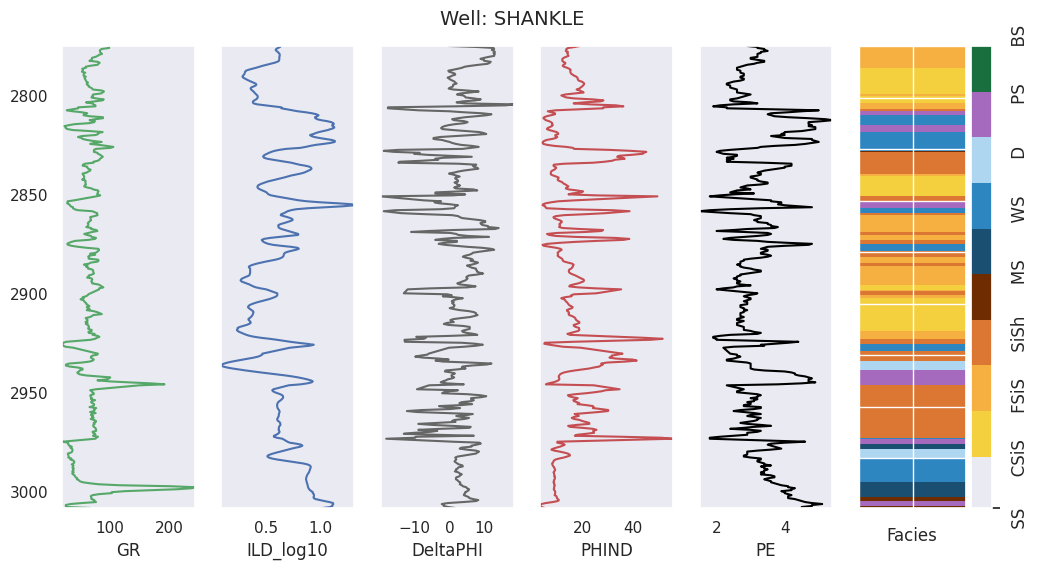

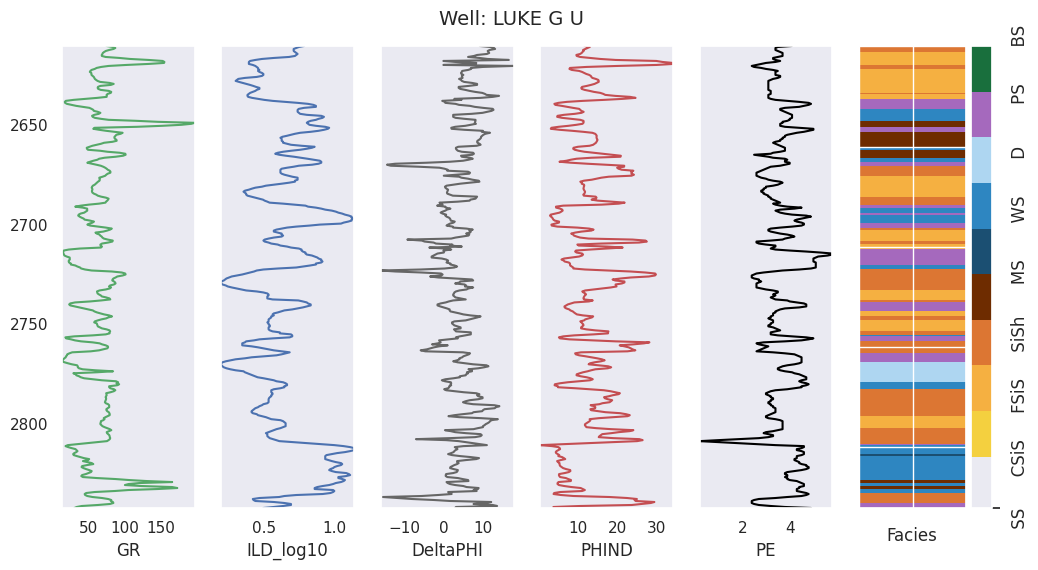

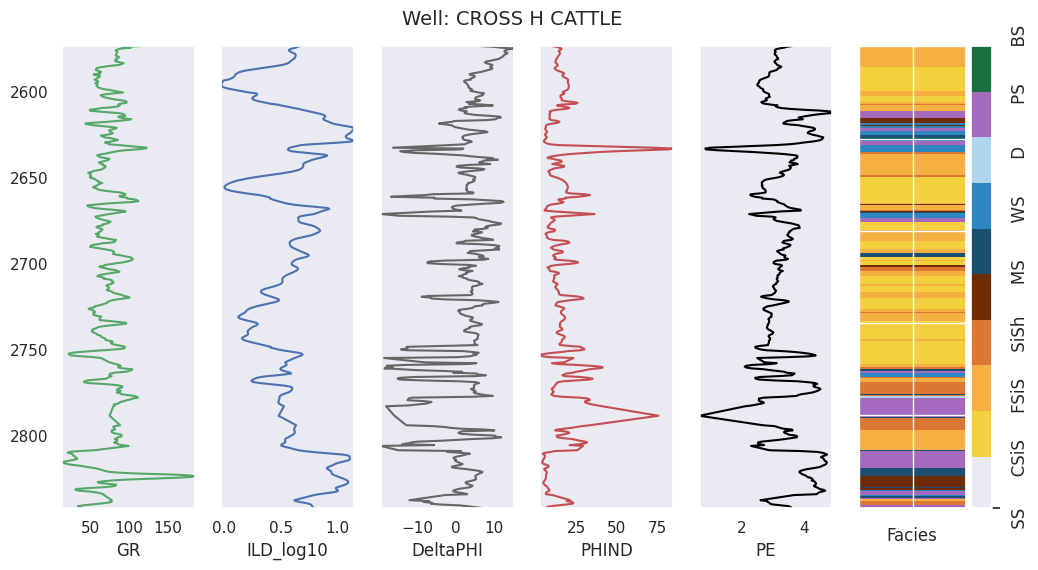

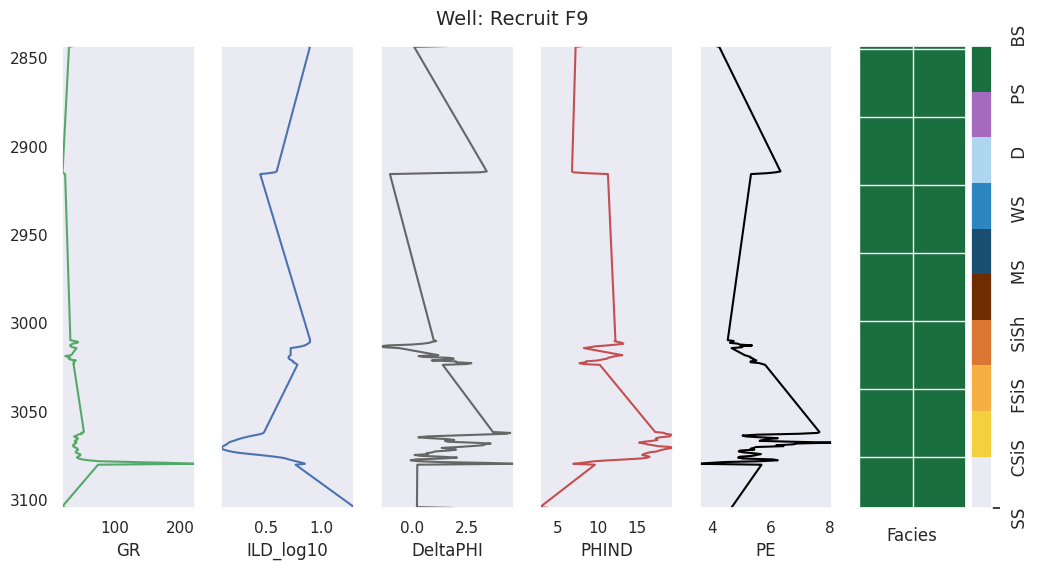

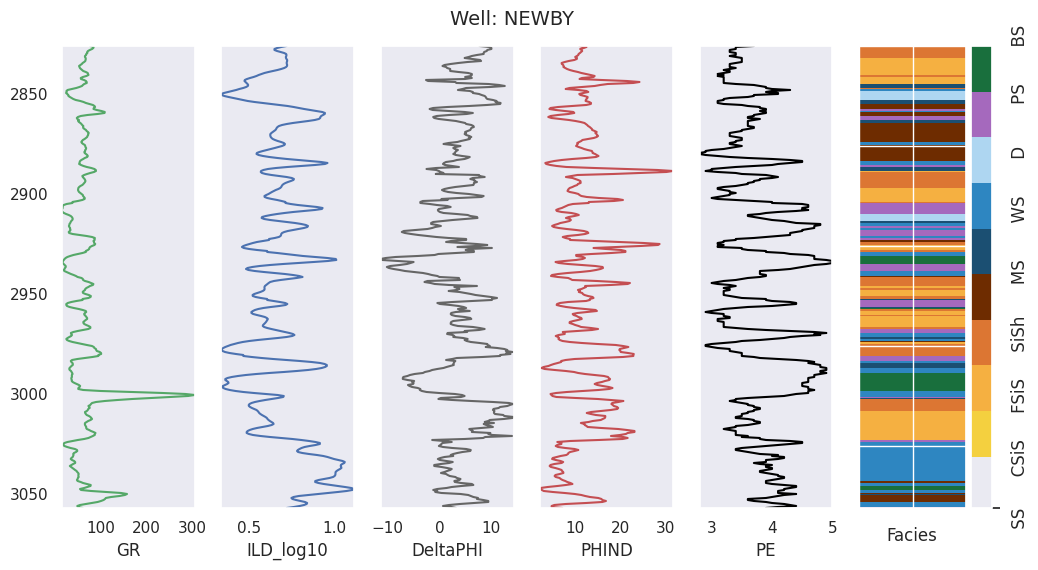

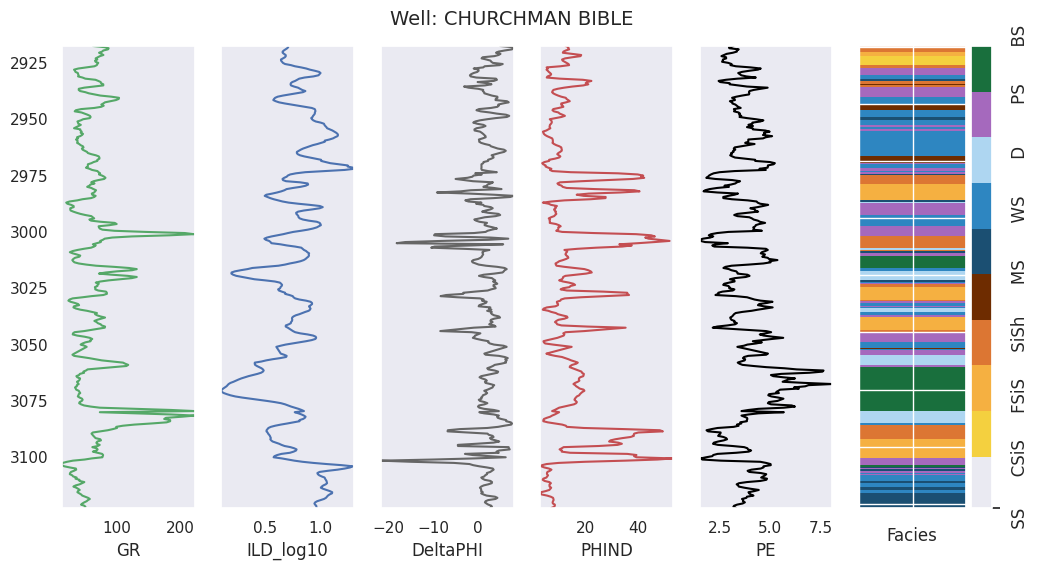

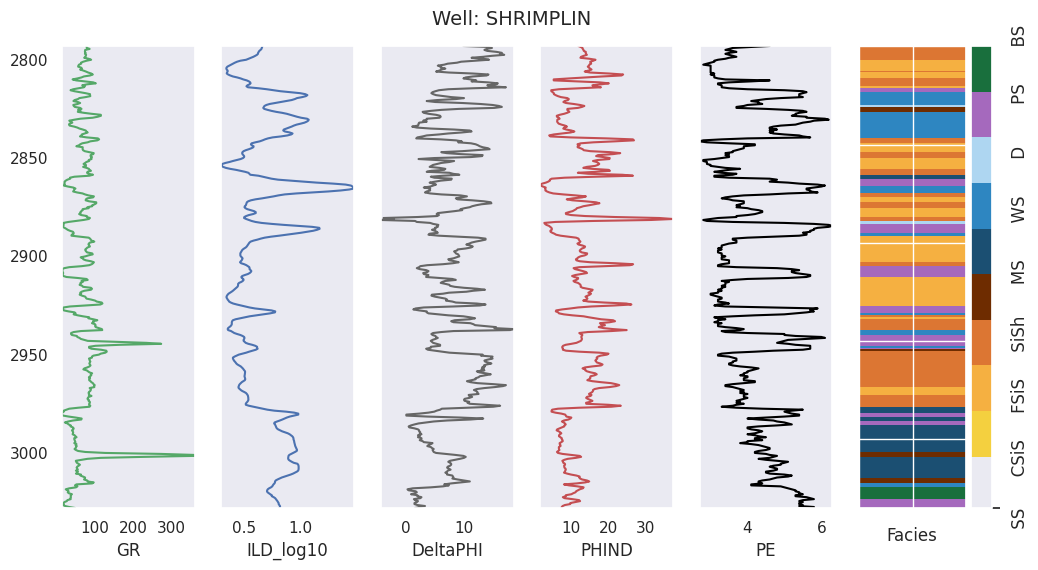

In [41]:
make_facies_log_plot(df[df['Well Name']=='SHANKLE'],f_colors)
make_facies_log_plot(df[df['Well Name']=='LUKE G U'],f_colors)
make_facies_log_plot(df[df['Well Name']=='CROSS H CATTLE'],f_colors)
make_facies_log_plot(df[df['Well Name']=='Recruit F9'],f_colors)
make_facies_log_plot(df[df['Well Name']=='NEWBY'],f_colors)
make_facies_log_plot(df[df['Well Name']=='CHURCHMAN BIBLE'],f_colors)
make_facies_log_plot(df[df['Well Name']=='SHRIMPLIN'],f_colors)

Doing a little more data exploratrion

Let us see the distribution of facies over the training set

SS      255
CSiS    620
FSiS    547
SiSh    156
MS      170
WS      432
D        94
PS      382
BS      161
Name: count, dtype: int64

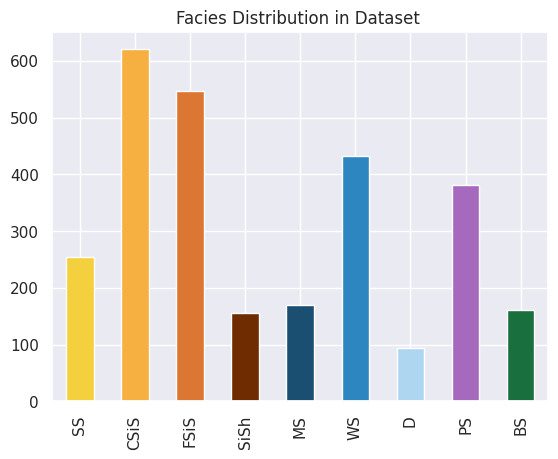

In [42]:
f_counts=df['Facies'].value_counts().sort_index()
f_counts.index=f_labels
f_counts.plot(kind='bar',color=f_colors,title='Facies Distribution in Dataset ')
f_counts

To visualise how with the properites(PE,PHIND,DeltaPHI,ILD_log10,GR) the facies type varies, we can make use of cross plot(commonly followed in geosciences).

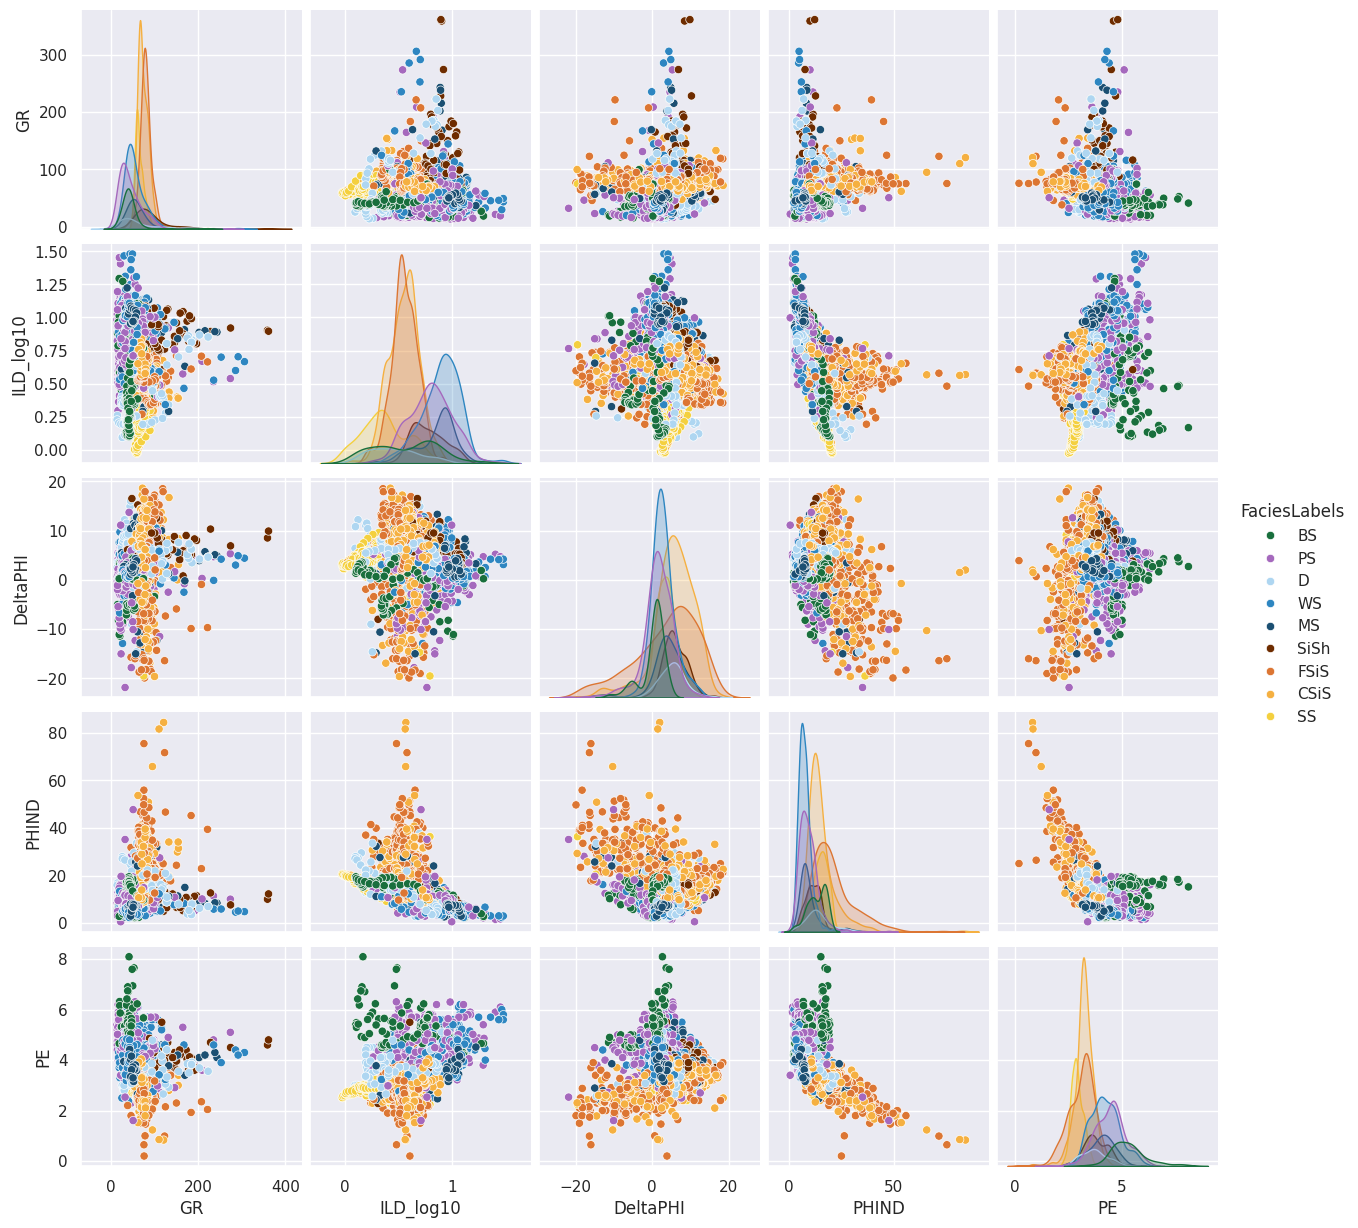

In [43]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc=dict(mpl.rcParams)

sns.set()
sns.pairplot(df.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),hue='FaciesLabels', palette=f_color_map,hue_order=list(reversed(f_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

Correlation Matrix: To determine how each feature linearly varies with the other

In [44]:
corr_matrix=df.select_dtypes(include=['number']).corr()
corr_matrix

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.363199,-0.335827,0.434966,-0.221680,-0.360088,0.699465,0.860088,0.065094
Depth,0.363199,1.000000,-0.085619,0.207171,-0.087318,-0.059062,0.285313,0.313186,-0.015109
GR,-0.335827,-0.085619,1.000000,-0.147170,0.182982,0.247347,-0.299145,-0.268035,-0.186145
ILD_log10,0.434966,0.207171,-0.147170,1.000000,-0.109111,-0.520112,0.429270,0.547478,0.093388
DeltaPHI,-0.221680,-0.087318,0.182982,-0.109111,1.000000,-0.284355,0.047548,-0.151405,0.042295
PHIND,-0.360088,-0.059062,0.247347,-0.520112,-0.284355,1.000000,-0.589487,-0.487452,-0.030956
PE,0.699465,0.285313,-0.299145,0.429270,0.047548,-0.589487,1.000000,0.648681,0.017317
NM_M,0.860088,0.313186,-0.268035,0.547478,-0.151405,-0.487452,0.648681,1.000000,0.025896
RELPOS,0.065094,-0.015109,-0.186145,0.093388,0.042295,-0.030956,0.017317,0.025896,1.000000


<Figure size 1400x800 with 0 Axes>

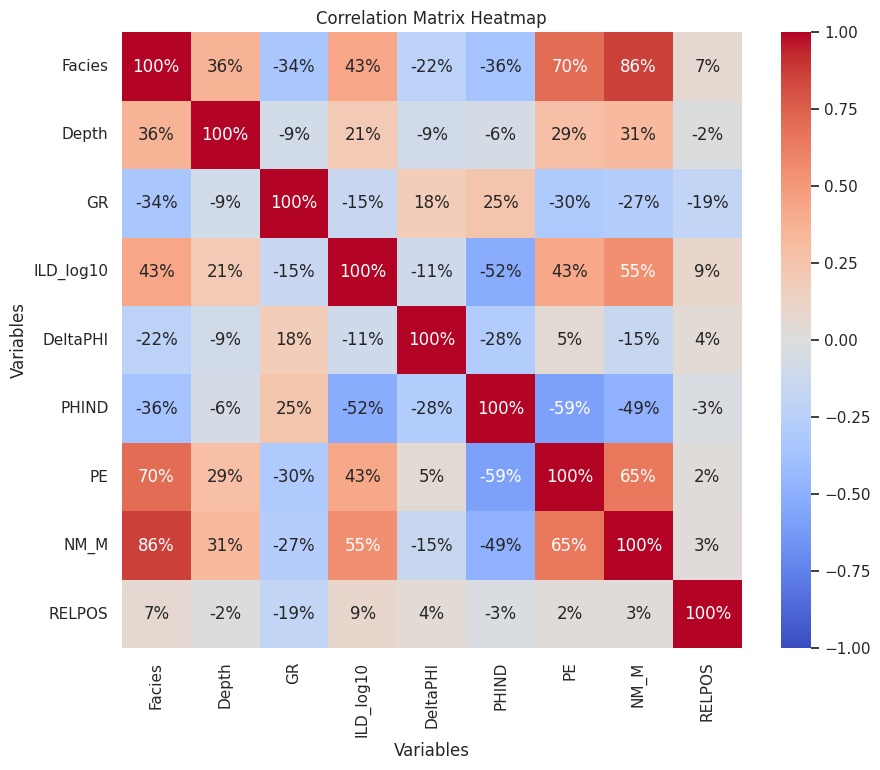

In [45]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(14,8))

# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap='coolwarm', vmin=-1, vmax=1)

# Set title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

It cam be seen from the above plot that NM_M and PE have the maximum correlation of 86% and 70% with the Facies Type.

# **DATA PRE-PROCESSING**

In [46]:
correct_facies_labels=df['Facies'].values
feature_vectors=df.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

Standardizing data to zero mean and unit variance

In [47]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(feature_vectors)
scaled_features=scaler.transform(feature_vectors)

Splitting Data Into Testing And Training

Splitted 25% for test set

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(scaled_features,correct_facies_labels,test_size=0.25,random_state=10)

# **Employing The ML Models**

Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,f1_score

RFC_model = RandomForestClassifier(max_depth=45, n_estimators=20, max_features=6).fit(X_train, y_train)
yhat_RFC = RFC_model.predict(X_test)

f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)
conf_RFC

RFC F1-score: 0.702


array([[ 43,  23,   1,   0,   0,   0,   0,   0,   0],
       [  8, 113,  25,   0,   1,   0,   0,   0,   0],
       [  1,  30,  98,   0,   2,   1,   0,   2,   0],
       [  0,   0,   0,  26,   1,   8,   0,   2,   0],
       [  0,   0,   0,   4,  16,   7,   1,   6,   0],
       [  0,   0,   1,   4,   8,  86,   1,  18,   3],
       [  0,   1,   0,   0,   1,   1,  20,   5,   2],
       [  0,   0,   0,   2,   6,  29,   3,  56,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1,  37]])

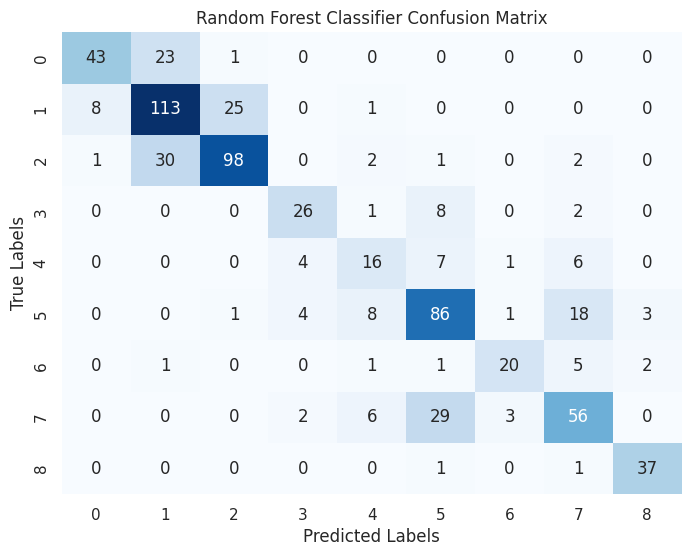

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_RFC, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

SVM

In [51]:
from sklearn import svm
SVM_model=svm.SVC(C=10, gamma=1)

SVM_model.fit(X_train,y_train)
yhat_SVM = SVM_model.predict(X_test)
conf_SVM = confusion_matrix(y_test, yhat_SVM)
conf_SVM

array([[ 51,  16,   0,   0,   0,   0,   0,   0,   0],
       [  7, 111,  27,   1,   0,   0,   0,   1,   0],
       [  3,  22, 104,   2,   1,   1,   0,   1,   0],
       [  0,   0,   0,  30,   0,   4,   0,   3,   0],
       [  0,   0,   0,   3,  20,   6,   0,   5,   0],
       [  0,   0,   2,   6,   9,  87,   0,  15,   2],
       [  0,   1,   2,   0,   1,   0,  23,   2,   1],
       [  0,   0,   0,   1,   8,  14,   2,  68,   3],
       [  0,   0,   1,   0,   0,   1,   0,   1,  36]])

SVM F1-score: 0.753


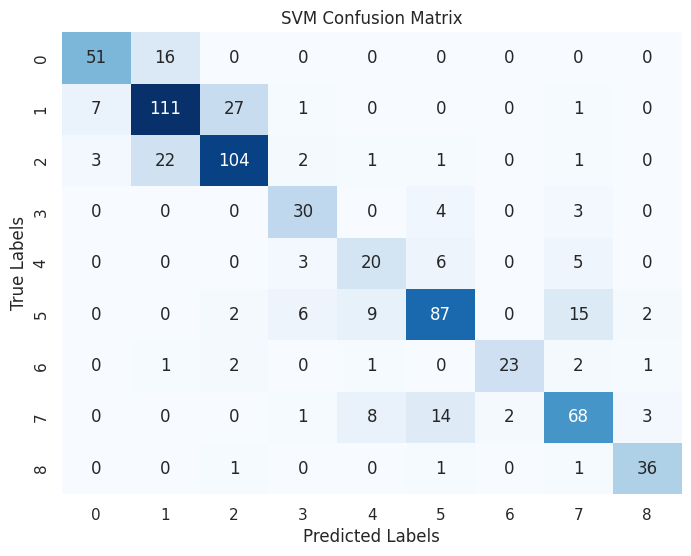

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_SVM, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM F1-score: %.3f" % f1SVM  )
plt.show()

KNN

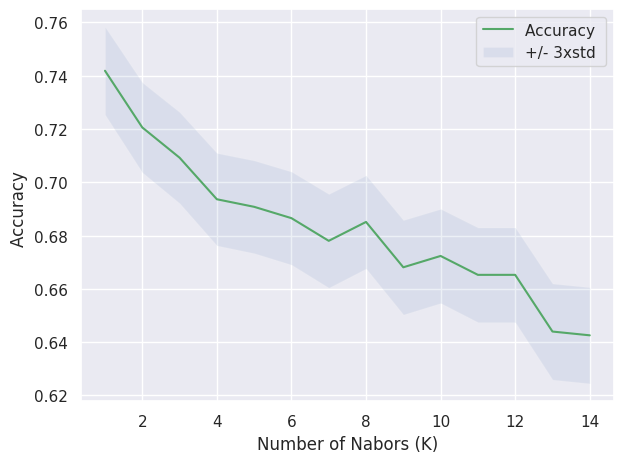

KNN F1-score: 0.717


array([[ 49,  16,   2,   0,   0,   0,   0,   0,   0],
       [  7, 105,  34,   1,   0,   0,   0,   0,   0],
       [  5,  25,  99,   1,   1,   1,   0,   2,   0],
       [  0,   0,   0,  27,   0,   8,   0,   2,   0],
       [  0,   0,   0,   4,  17,   6,   0,   6,   1],
       [  0,   0,   1,   4,   6,  88,   0,  18,   4],
       [  0,   1,   0,   0,   1,   0,  25,   2,   1],
       [  0,   0,   0,   1,  10,  22,   1,  58,   4],
       [  0,   0,   0,   0,   0,   0,   0,   1,  38]])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus
Ks=15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)
    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k=5
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=45, p=1,  weights='distance' ).fit(X_train, y_train)
KNN_model

#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


yhat_KNN = KNN_model.predict(X_test)

f1KNN = f1_score(y_test, yhat_KNN, average='weighted')

print("KNN F1-score: %.3f" % f1KNN  )

conf_KNN = confusion_matrix(y_test, yhat_KNN)
conf_KNN

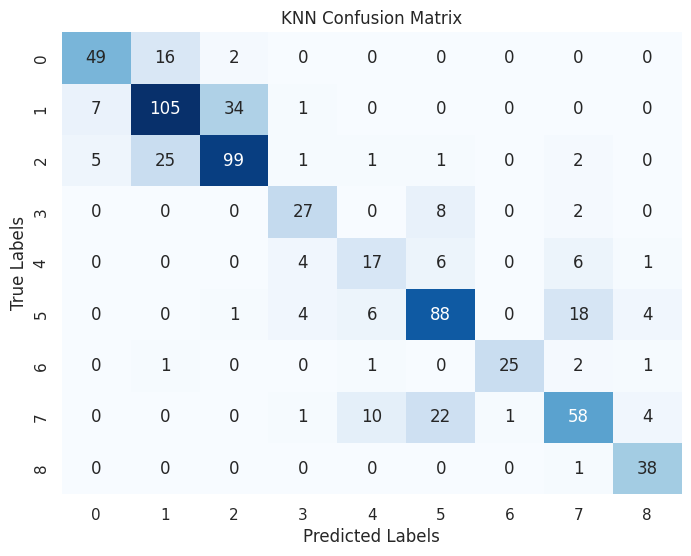

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_KNN, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(C=1).fit(X_train,y_train)
LR_model

yhat_LR=LR_model.predict(X_test)
f1LR=f1_score(y_test, yhat_LR, average='weighted')
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)
conf_LR

LR F1-score: 0.579


array([[ 45,  22,   0,   0,   0,   0,   0,   0,   0],
       [ 10, 101,  34,   0,   0,   1,   0,   1,   0],
       [  4,  54,  68,   2,   1,   1,   1,   3,   0],
       [  0,   0,   0,  19,   0,  17,   0,   1,   0],
       [  0,   0,   0,   4,   1,  21,   1,   7,   0],
       [  0,   0,   0,   3,   1,  88,   2,  24,   3],
       [  0,   0,   1,   3,   0,   3,  16,   7,   0],
       [  0,   0,   0,   1,   5,  32,   2,  48,   8],
       [  0,   0,   0,   0,   0,   2,   0,   7,  30]])

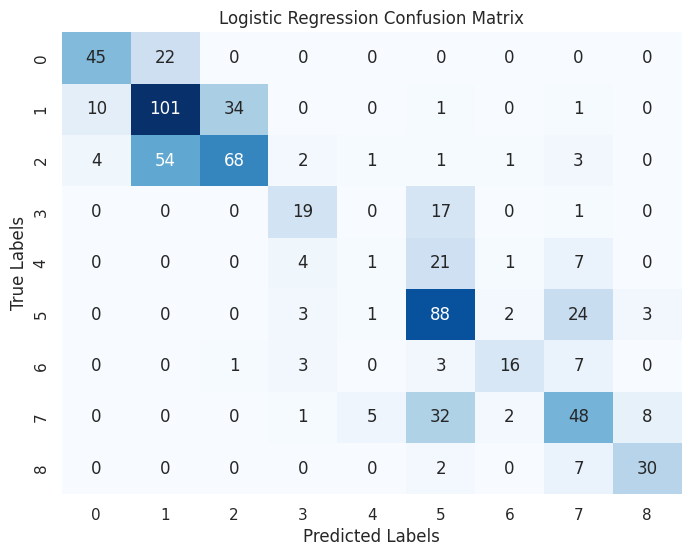

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_LR, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()

# Train the model
GNB_model.fit(X_train, y_train)

# Predict on test data
y_pred = GNB_model.predict(X_test)

# _Calculate F1 score
f1NB= f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1NB}")

# Print confusion matrix
conf_NB = confusion_matrix(y_test, y_pred)
print(conf_NB)

F1 Score: 0.2993962547162791
[[ 66   0   1   0   0   0   0   0   0]
 [121  12  12   0   0   1   0   0   1]
 [ 74  20  33   0   0   1   5   0   1]
 [  0   0   0   0   0  23  14   0   0]
 [  0   0   0   0   0  26   6   0   2]
 [  0   0   1   0   0 112   6   0   2]
 [  0   0   1   0   0   5  22   0   2]
 [  0   0   0   0   0  77   9   0  10]
 [  0   0   0   0   0   6   0   0  33]]


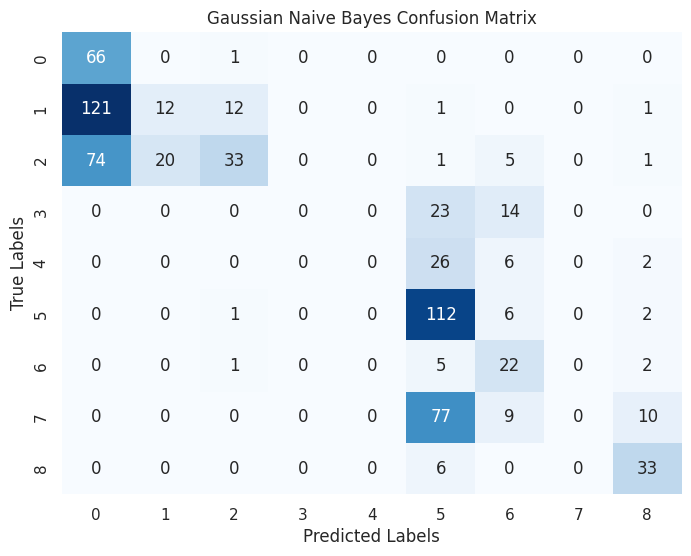

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_NB, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [59]:
data_frame1 ={'Model type': ['SVM', 'RFC', 'KNN', 'GNB', 'LR'],
       'F1-Score': [f1SVM, f1RFC, f1KNN, f1NB, f1LR]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','F1-Score' ] )
df1.round(2)

,Model type,F1-Score
0,SVM,0.75
1,RFC,0.70
2,KNN,0.72
3,GNB,0.30
4,LR,0.58


# **Applying The Models On the Blind Dataset**

Let us check how good the models work on the well ('Nolan') earlier taken out from the training data set.

In [60]:
y_blind=blind_data['Facies'].values

Extracting required features and normalizing the data by scalar transformation

In [61]:
blind_features=blind_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
# blind_features
X_blind=scaler.transform(blind_features)

Predicting The Facies Of Blind Data

In [62]:
#SVM
yhat_blind_SVM=SVM_model.predict(X_blind)
blind_data['SVM_Pred']=yhat_blind_SVM


#LR
yhat_blind_LR=LR_model.predict(X_blind)
blind_data['LR_Pred']=yhat_blind_LR


#KNN
yhat_blind_KNN = KNN_model.predict(X_blind)
blind_data['KNN_Pred']=yhat_blind_KNN


#RFC
yhat_blind_RFC=RFC_model.predict(X_blind)
blind_data['RFC_Pred']=yhat_blind_RFC


#GNB
yhat_blind_NB=GNB_model.predict(X_blind)
blind_data['GNB_Pred']=yhat_blind_NB

Calculation the f1-scores for blind data

In [63]:
#SVM
f1SVM_b=f1_score(y_blind,yhat_blind_SVM, average='weighted')

#LR
f1LR_b=f1_score(y_blind,yhat_blind_LR, average='weighted')

#KNN
f1KNN_b=f1_score(y_blind,yhat_blind_KNN, average='weighted')

#RFC
f1RFC_b=f1_score(y_blind,yhat_blind_RFC, average='weighted')

#GNB
f1GNB_b=f1_score(y_blind,yhat_blind_NB, average='weighted')

In [64]:
data_frame1 ={'Model type': ['SVM', 'RFC', 'KNN', 'GNB', 'LR'],
       'F1-Score': [f1SVM_b, f1RFC_b, f1KNN_b, f1GNB_b, f1LR_b]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','F1-Score' ] )
df1.round(2)

,Model type,F1-Score
0,SVM,0.49
1,RFC,0.54
2,KNN,0.50
3,GNB,0.07
4,LR,0.49


Now we shall plot the model's prediction performance on the blind data set

In [65]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

The plots below show variation of the feature variables alongside the respective facies and the respective model considered for the blind dataset well(Nolan well).

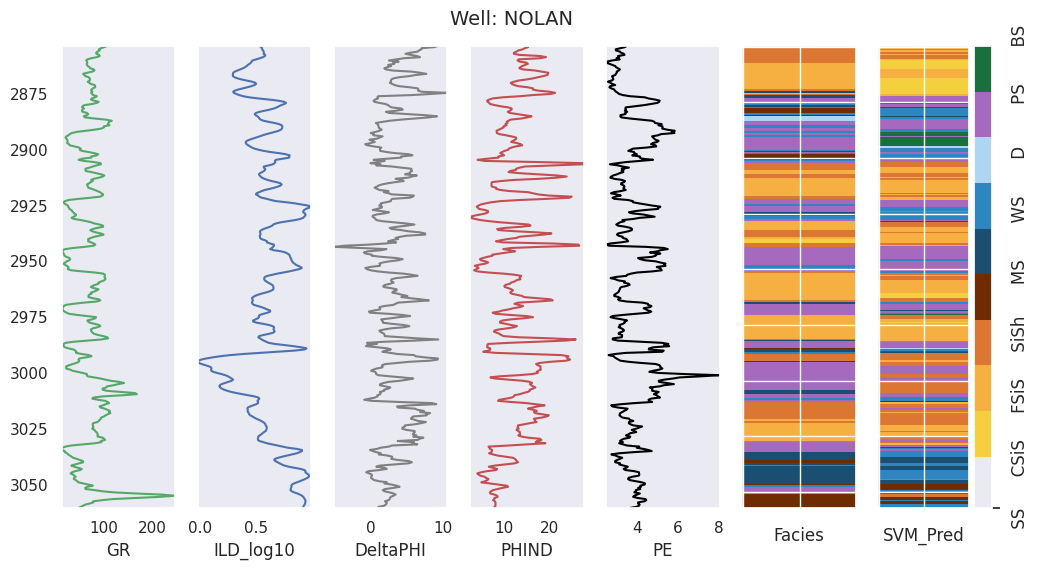

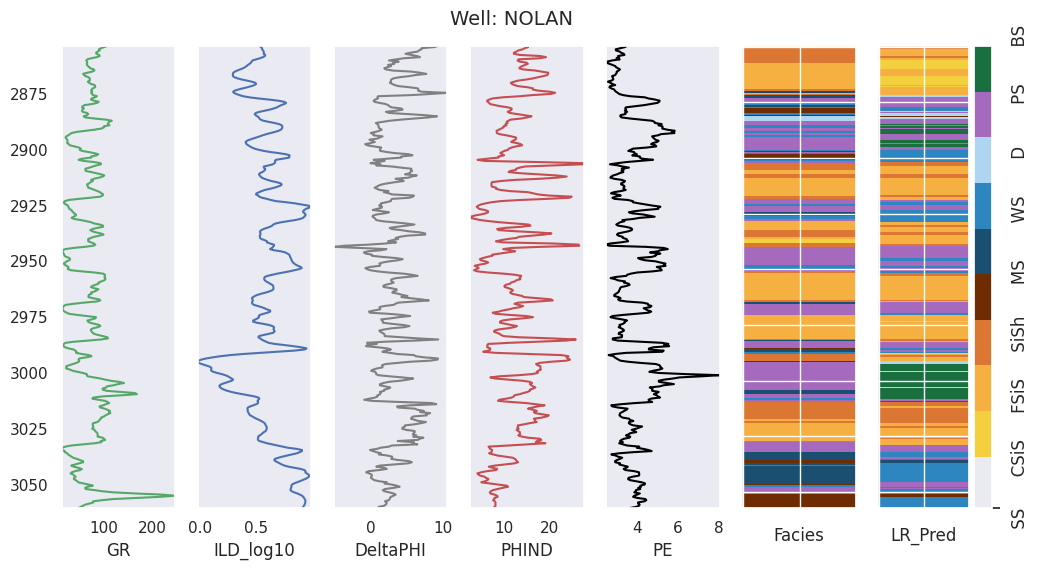

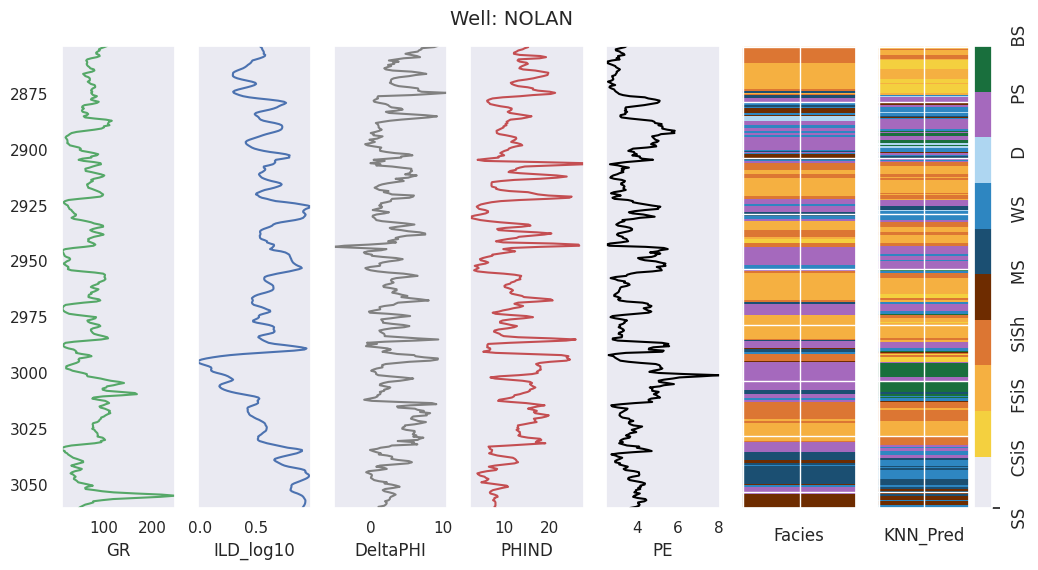

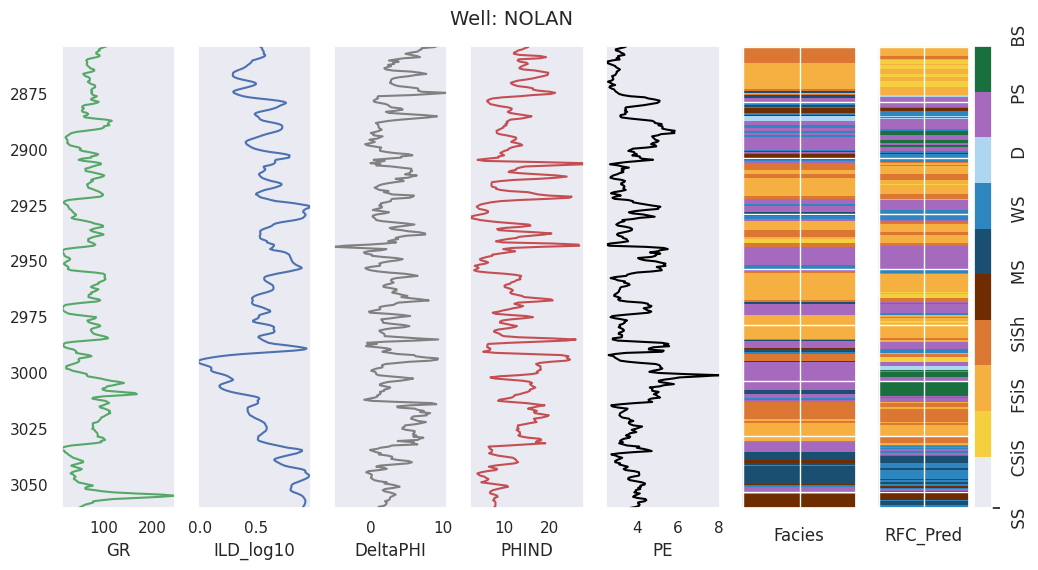

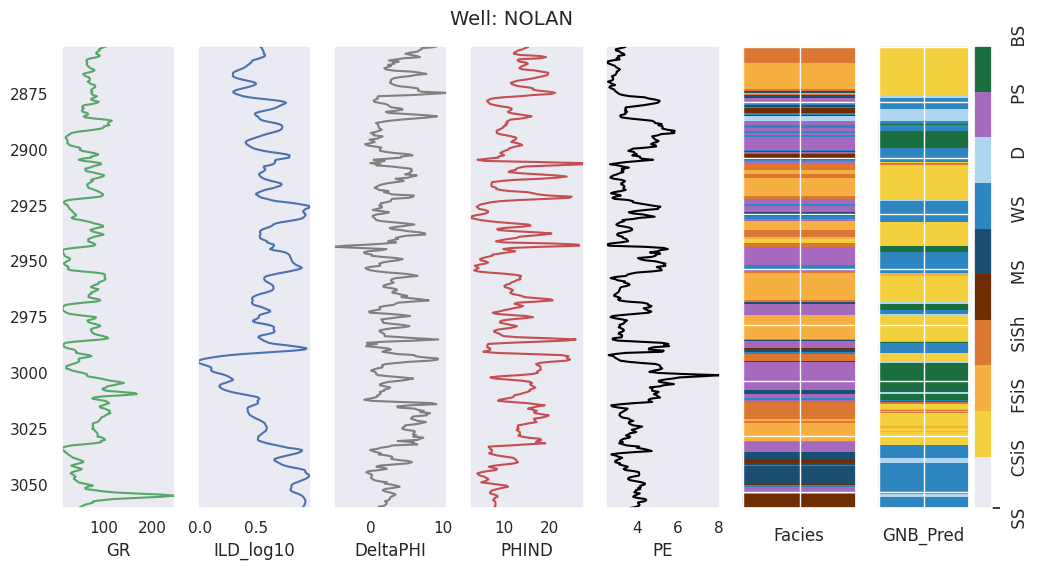

In [66]:
compare_facies_plot(blind_data,'SVM_Pred',f_colors)
compare_facies_plot(blind_data, 'LR_Pred',f_colors)
compare_facies_plot(blind_data, 'KNN_Pred',f_colors)
compare_facies_plot(blind_data,'RFC_Pred',f_colors)
compare_facies_plot(blind_data,'GNB_Pred',f_colors)